<h1><center> TAREA 2 EJERCICIO 7 </center></h1>

__Autor__: David Montaño Castro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Redes Neuronales"""

import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Imporar datos

In [2]:
df = pd.read_csv("severidades.csv")

# Descripción de los datos

## Valores faltantes

In [3]:
df.isna().sum()

edad            0
masacorporal    0
hijos           0
sexo            0
fumador         0
region          0
severidad       0
dtype: int64

## Resumen 

### Variables numéricas

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
masacorporal,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
hijos,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
severidad,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Variables nominales
Existe un desbalanceo en la información contenida en las personas fumadoras con 80% de la información perteneciente a gente que no fuma. 

In [5]:
for variable in df.select_dtypes(["object"]).columns:
    print(round(df[variable].value_counts(normalize = True) * 100,2),2*"\n")

masculino    50.52
femenino     49.48
Name: sexo, dtype: float64 


no    79.52
si    20.48
Name: fumador, dtype: float64 


sureste     27.20
centro      24.29
noroeste    24.29
noreste     24.22
Name: region, dtype: float64 




# One Hot Encoding

In [6]:
df1 = pd.get_dummies(df,["sexo","fumador","region"]);df1

,edad,masacorporal,hijos,severidad,sexo_femenino,sexo_masculino,fumador_no,fumador_si,region_centro,region_noreste,region_noroeste,region_sureste
0,19,27.900,0,16884.92400,1,0,0,1,1,0,0,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,0,1,0
4,32,28.880,0,3866.85520,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,1,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,0,1
1336,21,25.800,0,2007.94500,1,0,1,0,1,0,0,0


# Train-Test split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(df1.drop(columns = "severidad"), df1.severidad, test_size=0.3, random_state=44)

# Modelo Neuronal

## Clase tomada prestada de Erick

In [9]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')
        
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

## Modelo 

In [10]:
def build_model():
    model = keras.Sequential([
        layers.Dense(units=10, activation='elu', input_shape=[11]),
        layers.Dense(units=10, activation='elu'),
        layers.Dense(units=1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


## Ajuste  1000 epocas haciendo validacion cruzada

In [11]:
EPOCHS = 1000
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(xtrain, 
                    ytrain,
                    epochs=EPOCHS,
                    validation_split = 0.2, 
                    verbose=0, 
                    callbacks=[early_stop, PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Estadísticas del entrenamiento de la red neuronal

In [12]:
loss, mae, mse = model.evaluate(xtest, ytest, verbose=2)
print("Testing set Mean Abs Error: ",format(mae))

13/13 - 0s - loss: 25695156.0000 - mae: 3435.9697 - mse: 25695156.0000 - 22ms/epoch - 2ms/step
Testing set Mean Abs Error:  3435.9697265625


## $R^2$ 

R2 = 0.8020228787266508


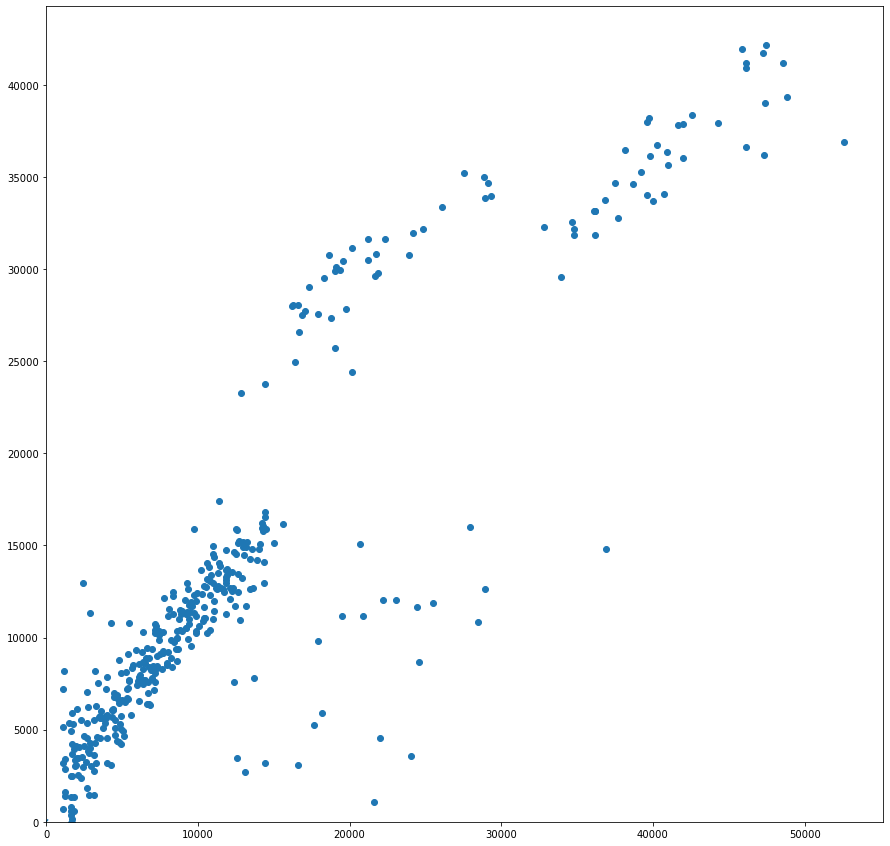

In [13]:
test_predictions = model.predict(xtest).flatten()
r2 =r2_score(ytest,test_predictions)
print('R2 =',r2)

fig = plt.figure(figsize=(15,15))
plt.scatter(ytest, test_predictions)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])

# Conclusión

El ajuste con las 11 variables resulto en un modelo con una $R^2$ = 0.8020, que es lo que se pedía.